# Formalia:

Please read the [assignment overview page](https://github.com/SocialComplexityLab/socialgraphs2023/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday September 26th, 2023 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via http://peergrade.io/

The assignment should be handed in as a group. To do this, all group members must register for peergrade individually. See how to hand in as a group here: https://help.peergrade.io/en/articles/69783-how-to-submit-as-a-group .

(If you haven't set up an account on peergrade yet, go to www.peergrade.io/join and type in the class code: ***DPZEV6***.)

# Part 1: Binning degree distributions


### Binning real numbers
  * Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import networkx as nx

In [6]:
# generate 5000 data points from a Gaussian distribution
n_points = 5000

# set the mean (μ) and standard deviation (σ)
mean = 2
std_dev = 0.125

# Generate 5000 data points from a Gaussian distribution
x = np.random.normal(mean, std_dev, n_points)

print(x)

[2.07672572 1.90157082 1.95320692 ... 2.05138678 2.04507853 1.96476615]


-----------------

  * Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?


In [8]:
# using numpy.histogram to bin numbers in x into 10 bins

# set the number of bins
num_bins = 10

# generate the histogram
hist_values, bin_edges = np.histogram(x, bins=num_bins)

# Print the histogram values and bin edges
print("Histogram Values (Counts):", hist_values)
print("Bin Edges:", bin_edges)

Histogram Values (Counts): [   5   36  182  528 1023 1337 1113  554  185   37]
Bin Edges: [1.52716976 1.61254012 1.69791049 1.78328086 1.86865122 1.95402159
 2.03939196 2.12476232 2.21013269 2.29550306 2.38087342]


Answer: The returning arrays of the function are two:
* Histogram values, which contains the count of data points that fall into each bin. The length of this array is equal to the number of bins you specify when calling the function.
* Bin edges, contains the edges of the bins, including the left edge of the first bin and the right edge of the last bin. The length of this array is one more than the number of bins you specify. The additional element represents the right edge of the last bin.

So as we can see, the length of the second array, which contains the edges, is one point bigger than the first array.

------------------

  * Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.


Answer: To deal with this issue, we can ignore the rightest most bin edge, since it is unnecessary for visualization. So when plotting the histogram, we can set the x-axis limits to only include the relevant range of bin edges. 

We will also calculate the bin centers to plot the binned data, since we want to represent each bin by a single value, which is usually the center of the bin. Now we can plot the data using the matplotlib.pyplot.plot function

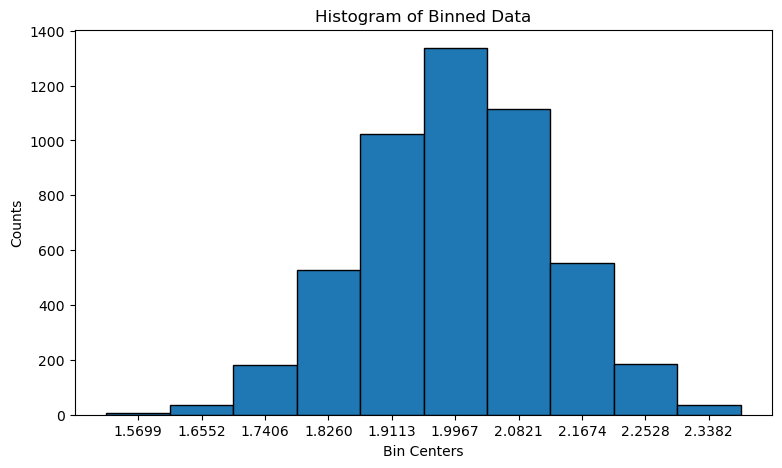

In [21]:
# calculate bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# set the figure size to make the graph wider
plt.figure(figsize=(9, 5)) 

# Plot the binned data, including bin centers
plt.bar(bin_centers, hist_values, width=(bin_edges[1] - bin_edges[0]), edgecolor='k')
plt.xlabel('Bin Centers')
plt.ylabel('Counts')
plt.title('Histogram of Binned Data')

# Set x-axis tick locations to be the bin_centers
plt.xticks(bin_centers)

plt.show()

-------------------

### Binning integers
  * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. 

Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers. 


In [24]:
n_points_poisson = 5000
lambda_poisson = 10

# generate 5000 numbers from a Poisson distribution with λ = 10
x_poisson = np.random.poisson(lambda_poisson, n_points_poisson)

# find the maximum and minimum values
maximum_value = np.max(x_poisson)
minimum_value = np.min(x_poisson)

print("Maximum Value:", maximum_value)
print("Minimum Value:", minimum_value)

Maximum Value: 23
Minimum Value: 1


------------------

  * Instead of simplify specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how `numpy.histogram` deals with the smallest an largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?). Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution. 


Answer part 1: All the numbers are contained between the minimum and maximum values we found, so we can use these for the left edge of the first bin, and for the right edge of the last bin. But we do need to add an extra value to the upper limit in order to make sure to include the maximum value.

In [25]:
# create the binning vector v, we add 1 to include the maximum value in the last bin
v = np.arange(minimum_value, maximum_value + 1)  


Answer part 2: The sum over bin counts represents the total number of data points, so it should be equal to the number of data points generated, which is 5000 in this case. The first and last element of the vector v relate to the minimum and maximum values of the Poisson distribution. The first element of the vector is set to the minimum value, and the last element is set to the maximum. 

In [28]:
# use numpy.histogram with the bin parameter
hist_poisson, bin_edges_poisson = np.histogram(x_poisson, bins=v)

# calculate the sum over bin counts
sum_counts = np.sum(hist_poisson)

print(f"The sum over the bin counts is: {np.sum(hist_values)}")

The sum over the bin counts is: 5000


--------------


  * Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution 


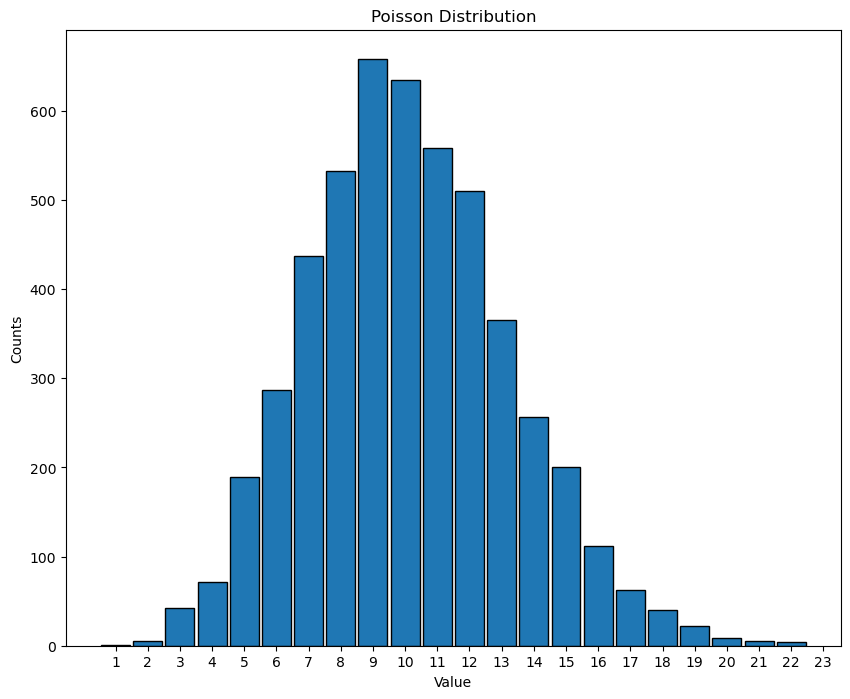

In [33]:
# set width and height of graph
fig = plt.figure(figsize = (10,8))

# create a bar chart to plot the distribution
plt.bar(bin_edges_poisson[:-1], hist_poisson, width=.9, edgecolor='k')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.title('Poisson Distribution')

# Set x-axis tick locations to be the bin edges of poisson
plt.xticks(bin_edges_poisson)

plt.show()

----------------

### Binning and plotting degree distributions. 
  * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? 
**Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.


From the formula above, we can find the value of p, since we know the number of nodes is 5000, and k = 10. 
Then we have that $$ p = \frac{\lambda}{N - 1} $$


In [39]:
# calculate p
p_er = lambda_poisson / (n_points_poisson - 1)
print(f'p is approximately: {np.round(p_er, 4)}')

p is approximately: 0.002


  * Now, use `networkx` to create the graph and extract the degree distribution.


In [57]:
# create a random network using the Erdős-Rényi graph
# N is equal to the n we used for Poisson
G_er = nx.erdos_renyi_graph(n_points_poisson, p_er)

# extract the degree distribution
degree_sequence = np.array([d for n, d in G_er.degree()])


  * Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.

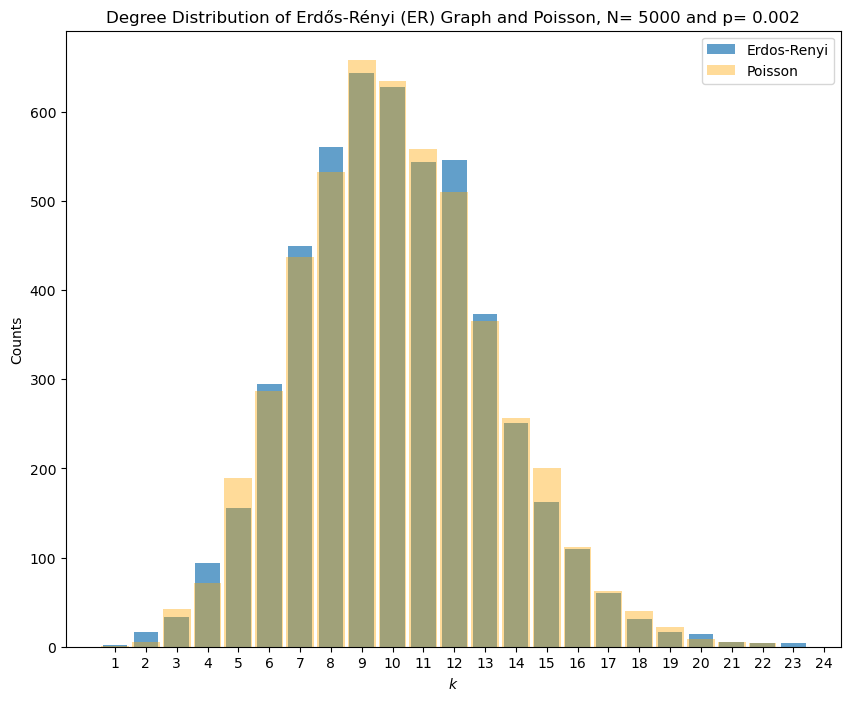

In [65]:
# create a bin edges vector and a hist vector
v = np.arange(degree_sequence.min(), degree_sequence.max()+1, 1)
hist_er, bin_edges_er = np.histogram(degree_sequence, bins=v)

# set width and height of graph
fig = plt.figure(figsize = (10,8))

# plot the degree distribution as a histogram
plt.bar(bin_edges_er[:-1], hist_er, label='Erdos-Renyi', alpha=0.7)
plt.bar(bin_edges_poisson[:-1], hist_poisson, width=.9, label='Poisson', color= 'orange', alpha=0.4)
plt.xticks(v)
plt.xlabel('$k$')
plt.ylabel('Counts')
plt.title(f'Degree Distribution of Erdős-Rényi (ER) Graph and Poisson, N= {5000} and p= {np.round(p_er,3)}')
plt.legend()

# Part 2: Random networks and plotting in `networkx`
 
* In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.
* Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
  * Extract the Giant Connected Component, GCC. (Hint. You can use `networkx.connected_component_subgraphs`)
  * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
  * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
  * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)

# Part 3: Watts-Strogatz Networks

* Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.


In [67]:
# 500 nodes and average degree = 4 for p = 0, 0.1, and 1
n = 500
k = 4
p_values = [0, 0.1, 1]
graphs = []

# create Watts-Strogatz graphs
for p in p_values:
    G = nx.watts_strogatz_graph(n, k, p)
    graphs.append(G)

# calculate the average shortest path length ⟨d⟩ for each graph
for i, G in enumerate(graphs):
    d= nx.average_shortest_path_length(G)
    print(f"For p = {p_values[i]}, ⟨d⟩ = {d:.3f}")

For p = 0, ⟨d⟩ = 62.876
For p = 0.1, ⟨d⟩ = 7.610
For p = 1, ⟨d⟩ = 4.750


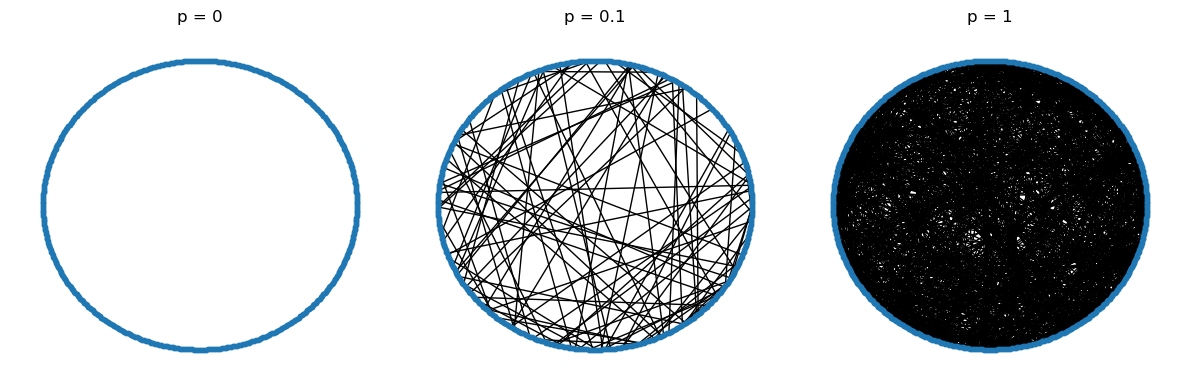

In [68]:
# plot the graphs to visualize this
plt.figure(figsize=(12, 4))
for i, G in enumerate(graphs):
    plt.subplot(1, 3, i + 1)
    pos = nx.circular_layout(G)
    nx.draw(G, pos, node_size=10)
    plt.title(f"p = {p_values[i]}")
plt.tight_layout()
plt.show()

Answer: What happens when p = 1? When p = 1, all edges are randomly assigned, so it is a random network, with no clear structure. It has a high degree of randomness and a very short average shortest path length. The avg shortest path length is very low, indicating that any two nodes in the graph can be connected by a relatively small number of hops. The network loses its small-world property.

---------------

* Let's understand the behavior of the WS model as we increase _p_ in more detail.. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).


![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ws.png)

In [69]:
p_values_new = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
nNetworks = 50
avg_d_values = [] 
std_d_values = []

In [70]:
# generate networks and calculate ⟨d⟩ for each p
for p in p_values_new:
    avg_d_list = []  # to store ⟨d⟩ values for 50 networks with the same p
    for _ in range(nNetworks):
        G = nx.watts_strogatz_graph(n, k, p)
        avg_d = nx.average_shortest_path_length(G)
        avg_d_list.append(avg_d)
        
    avg_d_values.append(np.mean(avg_d_list))  # Calculate the average ⟨d⟩ for this p
    std_d_values.append(np.std(avg_d_list))  # Calculate the standard deviation of ⟨d⟩

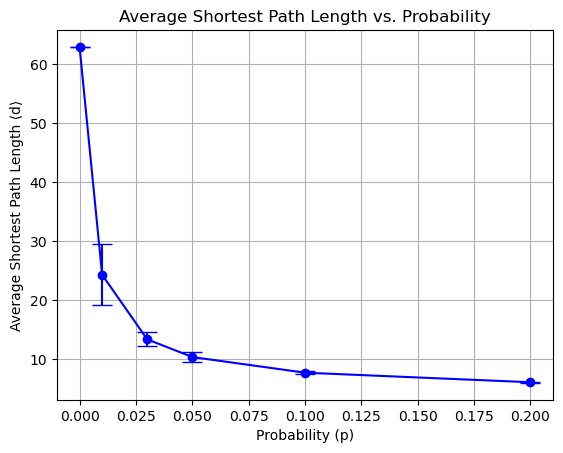

In [77]:
# create the plot with error bars
plt.errorbar(p_values_new, avg_d_values, yerr=std_d_values, fmt='-o', color='b', capsize=7)
plt.xlabel('Probability (p)')
plt.ylabel('Average Shortest Path Length ⟨d⟩')
plt.title('Average Shortest Path Length vs. Probability')
plt.grid(True)
plt.show()

# Part 5 Power-laws and the friendship paradox

Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:

* Pick a node _i_ at random (e.g. use `random.choice`). [Find its degree](http://networkx.lanl.gov/reference/generated/networkx.Graph.degree.html).
* Find _i_'s [neighbors](http://networkx.lanl.gov/reference/generated/networkx.Graph.neighbors.html). And calculate their average degree.
* Compare the two numbers to check if it's true that _i_'s friends (on average) have more friends than _i_.
* Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment. 

* Compare to the ER network of same size and same $p$. What are the differences? Explain in your own words. *Hint*: To get started, take a look at the degree distribution, and study the number of connected components.

# Part 6 Configuration-model networks

Next, we will create configuration-model networks with degree distributions of our own choice. Follow the recipe below for success

* Extract the degree sequence for the 100-node Barabasi-Albert network you created in Part 4 above. Create the configuration-model network with an algorithm you have coded on your own and include this algorithm as part of your answer to this exercise (so don't use the built-in NetworkX function, but the one you created during week 3). 
* Plot the network using NetworkX. When you compare this network to your Barabasi-Albert network visually, what differences do you notice?
* Create a 5000-node configuration-model network, where half of the nodes have degree 3 and the other half have degree 5. Again, create the network using the function you coded in Week 3, and not using the NetworkX function.
* What should the sum of node degrees be if all nodes had degrees as described in the exercise?
* Calculate and print the sum of node degrees and plot the binned degree distribution nicely. If the node degrees are not exactly as described in the exercise (half having degree 3, the other half degree 5), explain what might have caused this difference in node degrees.